✅ Config loaded successfully from: d:\PawScan\src\config.py
  PROJECT_ROOT: D:\PawScan
  DATASET_PATH: D:\PawScan\data\dataset
  MODEL_SAVE_PATH: D:\PawScan\models
Using dataset path: D:\PawScan\data\dataset

TRAIN SET:
Classes: 6
Total images: 3022
  demodicosis: 588 images (19.5%)
  Dermatitis: 546 images (18.1%)
  Fungal_infections: 375 images (12.4%)
  Healthy: 492 images (16.3%)
  Hypersensitivity: 230 images (7.6%)
  ringworm: 791 images (26.2%)

VALID SET:
Classes: 6
Total images: 860
  demodicosis: 174 images (20.2%)
  Dermatitis: 175 images (20.3%)
  Fungal_infections: 97 images (11.3%)
  Healthy: 139 images (16.2%)
  Hypersensitivity: 63 images (7.3%)
  ringworm: 212 images (24.7%)

TEST SET:
Classes: 6
Total images: 433
  demodicosis: 100 images (23.1%)
  Dermatitis: 66 images (15.2%)
  Fungal_infections: 54 images (12.5%)
  Healthy: 69 images (15.9%)
  Hypersensitivity: 29 images (6.7%)
  ringworm: 115 images (26.6%)


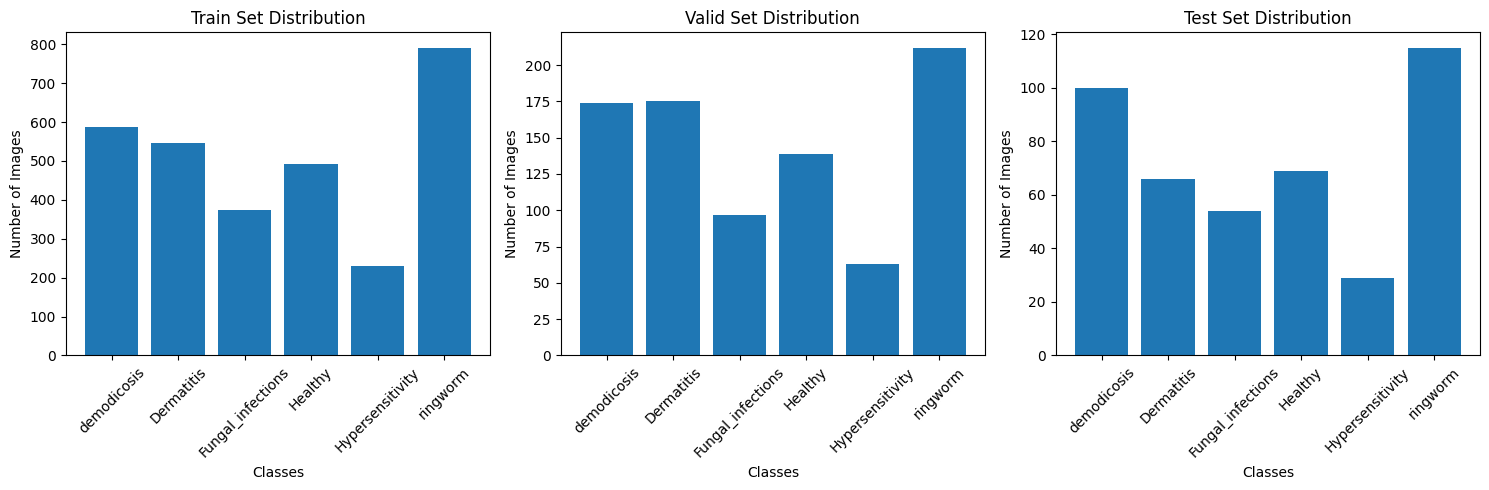

In [ ]:
import sys
from pathlib import Path

# Add src/ to Python path so we can import config.py
PROJECT_ROOT = Path.cwd()
if PROJECT_ROOT.name == "notebooks":
    PROJECT_ROOT = PROJECT_ROOT.parent

SRC_PATH = PROJECT_ROOT / "src"
if SRC_PATH not in sys.path:
    sys.path.append(str(SRC_PATH))


import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import warnings

from config import DATASET_PATH, MODEL_SAVE_PATH  

warnings.filterwarnings('ignore')

# Ensure model directory exists
MODEL_SAVE_PATH.mkdir(parents=True, exist_ok=True)

print(f"Using dataset path: {DATASET_PATH}")

# Dataset exploration function
def explore_dataset(dataset_path):
    """Explore dataset structure and class distribution"""
    subsets = ['train', 'valid', 'test']
    dataset_info = {}

    for subset in subsets:
        subset_path = dataset_path / subset
        if not subset_path.exists():
            print(f"Warning: {subset} directory not found!")
            continue

        classes = [d for d in os.listdir(subset_path) if (subset_path / d).is_dir()]
        class_counts = {}
        total_images = 0

        for class_name in classes:
            class_path = subset_path / class_name
            image_files = [f for f in os.listdir(class_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            count = len(image_files)
            class_counts[class_name] = count
            total_images += count

        dataset_info[subset] = {
            'classes': classes,
            'class_counts': class_counts,
            'total_images': total_images
        }

        print(f"\n{subset.upper()} SET:")
        print(f"Classes: {len(classes)}")
        print(f"Total images: {total_images}")
        for class_name, count in class_counts.items():
            percentage = (count / total_images) * 100
            print(f"  {class_name}: {count} images ({percentage:.1f}%)")

    return dataset_info


dataset_info = explore_dataset(DATASET_PATH)

# Plot class distribution
def plot_class_distribution(dataset_info):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    for idx, subset in enumerate(['train', 'valid', 'test']):
        if subset in dataset_info:
            classes = list(dataset_info[subset]['class_counts'].keys())
            counts = list(dataset_info[subset]['class_counts'].values())

            axes[idx].bar(classes, counts)
            axes[idx].set_title(f'{subset.capitalize()} Set Distribution')
            axes[idx].set_xlabel('Classes')
            axes[idx].set_ylabel('Number of Images')
            axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()


plot_class_distribution(dataset_info)
